In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
lon_min = 10;
lon_max = 55;
lat_min = -35;
lat_max = 20;
step=0.5;
lon_bins=np.arange(lon_min,lon_max,step)
lat_bins=np.arange(lat_min,lat_max,step)

M0 = np.zeros([len(lon_bins),len(lat_bins)])
logfile=open('.01log','w')

neicCat='./data/NEIC_Africa_gt4_5_short.csv'
cat = pd.read_csv(neicCat)
cat[0:5]

,time,latitude,longitude,depth,mag,magType,M0,Mw
0,1990-05-20T02:22:01.620Z,5.121,32.145,14.9,7.2,mw,26.90,7.200
1,1990-05-24T20:00:08.190Z,5.358,31.848,16.0,7.1,mw,26.75,7.100
2,2006-02-22T22:19:07.800Z,-21.324,33.583,11.0,7.0,mwb,26.60,7.000
3,2005-12-05T12:19:56.620Z,-6.224,29.830,22.0,6.8,mwc,26.30,6.800
4,1977-12-28T02:45:36.700Z,16.659,40.278,33.0,6.6,ms,25.59,6.492


In [179]:
for xi,x in enumerate(lon_bins):
    for yi,y in enumerate(lat_bins):
        filter = ((cat['longitude']>=x)
                    & (cat['longitude']<(x+step))
                    & (cat['latitude']>=y)
                    & (cat['latitude']<(y+step)))
        M0[xi,yi] = sum([float(m) for m in cat[filter]['M0']])

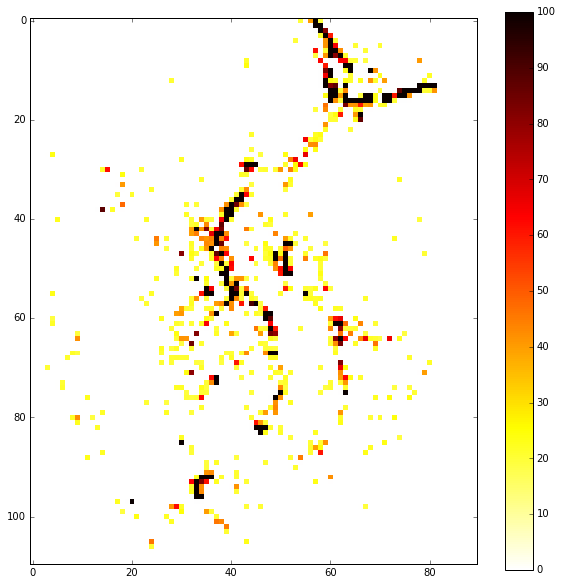

In [222]:
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.imshow(np.flipud(M0.transpose()), 
          cmap=plt.cm.hot_r, 
          interpolation='None',
          clim=([0,100]))
cbar = fig.colorbar(cax)
# cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar


In [ ]:
.get_events()

[V,D]=eig(M)